In [21]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict
%matplotlib inline
import numpy as np
import spacy
nlp=spacy.load('en')

In [2]:
worddatafile="../../voa/OBV2/obv_words_v2_28-01-2017.tsv"
trialdatafile="../../voa/OBV2/obv_defendants_trials.tsv"

worddata=pd.DataFrame.from_csv(worddatafile,sep='\t')
trialdata=pd.DataFrame.from_csv(trialdatafile,sep='\t')

/Users/juliewe/miniconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2787: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


In [17]:
def make_countdict(alldata):
    countdict={}
    blacklist=['words','obc_hiscoCode']

    for heading in alldata.columns:
        #print('Generating counts for ' +heading)
        if heading not in blacklist:
            countdict[heading]=defaultdict(int)
            selection = alldata[heading]
            for item in selection:
                #print(item)
                countdict[heading][item]+=1
        else:
            #print('skipping')
            pass

    return countdict

def validated(reqlist,valuedata):
    
    reqdict={}
    for (field,value) in reqlist:
        
        parts=field.split(':')
        if len(parts)==1:
            if field in valuedata.keys():
                if value in valuedata[field].keys():
                    reqdict[field]=value
                
            
        else:
            if (parts[1]=="max" or parts[1]=="min") and parts[0] in valuedata.keys():
                if value in valuedata[parts[0]].keys() and isinstance(value,int):
                    reqdict[field]=value
            
    return reqdict


def build_corpus(worddf,trialdf,reqlist,join='obo_trial'):
    
    trialreqdict=validated(reqlist,make_countdict(trialdf))
    wordsreqdict=validated(reqlist,make_countdict(worddf))
    
    ok=True
    for (req,_value) in reqlist:
        if req in trialreqdict.keys() or req in wordsreqdict.keys():
            pass
        else:
            print("Requirement {} not satisfied".format(req))
            ok=False
     
    if not ok:
        return None
        
    
    trials=trialdf
    for req in trialreqdict.keys():
        parts=req.split(':')
        if len(parts)>1:
            if parts[1]=='max':
                trials=trials[trials[parts[0]]<=trialreqdict[req]]
            elif parts[1]=='min':
                trials=trials[trials[parts[0]]>=trialreqdict[req]]
        else:
            trials=trials[trials[req]==trialreqdict[req]]
            
    wdf =worddf[worddf[join].isin(trials[join])]
    #print(wdf.head())
    for req in wordsreqdict.keys():
        parts=req.split(':')
        if len(parts)>1:
            if parts[1]=='max':
                wdf=wdf[wdf[parts[0]]<=wordsreqdict[req]]
            elif parts[1]=='min':
                wdf=wdf[wdf[parts[0]]>=wordsreqdict[req]]
        else:
            wdf=wdf[wdf[req]==wordsreqdict[req]]
            
    selection=[line for line in wdf['words']]
    return selection

def corpus_generator(characteristics,wdf,tdf,join='obo_trial'):
    output_file="corpus"
    for (_,characteristic) in characteristics:
        output_file+="_"+str(characteristic)

    selection=build_corpus(wdf,tdf,characteristics,join=join)

    if selection==None:
        print("No corpus generated for {}".format(characteristics))
        return None
        
    else:
    #print(selection)

        with open(output_file,"w") as output:    
            for item in selection:
                output.write(item+"\n")
        print("Generated corpus {} with {} lines".format(output_file,str(len(selection))))
        return(output_file,len(selection))


In [18]:
allreqlist=[('deft_offcat','theft')]
orlist=[('obv_role','def'),('obv_role','wv')]
year_min=1800
year_max=1821
year_step=1

filedict={}
for year in np.arange(year_min,year_max,year_step):
    reqlist=allreqlist+[('year',year)]
    myfiles=[]
    for req in orlist:
        newreqs=reqlist+[req]
        res=corpus_generator(newreqs,worddata,trialdata)
        if res!=None:
            myfiles.append(res[0])
    filedict[year]=myfiles
    
print(filedict)


Generated corpus corpus_theft_1800_def with 268 lines
Generated corpus corpus_theft_1800_wv with 3602 lines
Requirement year not satisfied
No corpus generated for [('deft_offcat', 'theft'), ('year', 1801), ('obv_role', 'def')]
Requirement year not satisfied
No corpus generated for [('deft_offcat', 'theft'), ('year', 1801), ('obv_role', 'wv')]
Generated corpus corpus_theft_1802_def with 235 lines
Generated corpus corpus_theft_1802_wv with 1945 lines
Generated corpus corpus_theft_1803_def with 215 lines
Generated corpus corpus_theft_1803_wv with 2184 lines
Generated corpus corpus_theft_1804_def with 44 lines
Generated corpus corpus_theft_1804_wv with 698 lines
Generated corpus corpus_theft_1805_def with 94 lines
Generated corpus corpus_theft_1805_wv with 1186 lines
Generated corpus corpus_theft_1806_def with 82 lines
Generated corpus corpus_theft_1806_wv with 1291 lines
Generated corpus corpus_theft_1807_def with 55 lines
Generated corpus corpus_theft_1807_wv with 675 lines
Generated cor

In [20]:
import nlp_tools
p=100

corpora={}

for year in np.arange(year_min,year_max,year_step):
    corpora[year]=nlp_tools.corpus(filedict[year],nlp,prop=p,ner=False)

Loading sourcefiles
Running basic analysis
Analysing 100%. Chunks of size 388
Completed 388 docs (10.025839793281653% complete)
Completed 776 docs (20.051679586563306% complete)
Completed 1164 docs (30.07751937984496% complete)
Completed 1552 docs (40.10335917312661% complete)
Completed 1940 docs (50.12919896640827% complete)
Completed 2328 docs (60.15503875968992% complete)
Completed 2716 docs (70.18087855297158% complete)
Completed 3104 docs (80.20671834625323% complete)
Completed 3492 docs (90.23255813953489% complete)
Number of documents is 3870
Loading sourcefiles
Running basic analysis
Analysing 100%. Chunks of size 1
Number of documents is 0
Loading sourcefiles
Running basic analysis
Analysing 100%. Chunks of size 219
Completed 219 docs (10.045871559633028% complete)
Completed 438 docs (20.091743119266056% complete)
Completed 657 docs (30.137614678899084% complete)
Completed 876 docs (40.18348623853211% complete)
Completed 1095 docs (50.22935779816514% complete)
Completed 1314 d

Number of documents is 1983
Loading sourcefiles
Running basic analysis
Analysing 100%. Chunks of size 55
Completed 55 docs (10.091743119266056% complete)
Completed 110 docs (20.18348623853211% complete)
Completed 165 docs (30.275229357798164% complete)
Completed 220 docs (40.36697247706422% complete)
Completed 275 docs (50.45871559633027% complete)
Completed 330 docs (60.55045871559633% complete)
Completed 385 docs (70.64220183486239% complete)
Completed 440 docs (80.73394495412845% complete)
Completed 495 docs (90.8256880733945% complete)
Number of documents is 545
Loading sourcefiles
Running basic analysis
Analysing 100%. Chunks of size 229
Completed 229 docs (10.039456378781237% complete)
Completed 458 docs (20.078912757562474% complete)
Completed 687 docs (30.11836913634371% complete)
Completed 916 docs (40.15782551512495% complete)
Completed 1145 docs (50.19728189390618% complete)
Completed 1374 docs (60.23673827268742% complete)
Completed 1603 docs (70.27619465146866% complete)
C

In [31]:
def autolabel(rects,ax):
    """
    Attach a text label above each bar displaying its height
    """
    
    for rect in rects:
        height = rect.get_height()

        ax.text(rect.get_x() + rect.get_width()/2., height*1.1,
                '%1.1f' % height,
                ha='center', va='bottom')
def display_list(xvalues,yvalueslist,leg=None,title=None):
    width=0.7/len(yvalueslist)      
    N=len(xvalues)
    ind=np.arange(N)
    fig,ax=plt.subplots(figsize=(20,12))
    rectset=[]
    colors=['r','b','y','g']
    for i,ps in enumerate(yvalueslist):
        rectset.append(ax.bar(ind+i*width,ps,width,color=colors[i]))
    
    if leg!=None:
        ax.legend(rectset,leg)
    ax.set_xticks(ind)
    ax.set_xticklabels(xvalues)
    ax.set_xlabel('Year')
    ax.set_ylabel('Probability')
    ax.set_ylim(0,10)
    for rects in rectset:
        autolabel(rects,ax)
    if title!=None:
        ax.set_title(title)
    plt.show()

In [35]:
aword=";"

def plotword(aword):
    xrange=np.arange(year_min,year_max,year_step)
    yvalues=[]
    pvalues=[]
    for year in xrange:
        yvalues.append(corpora[year].allworddict[aword])
        if corpora[year].wordtotal > 0:
            pvalues.append(100*corpora[year].allworddict[aword]/corpora[year].wordtotal)
        else:
            pvalues.append(0)
    display_list(xrange,[pvalues],title="Time series for {}".format(aword))

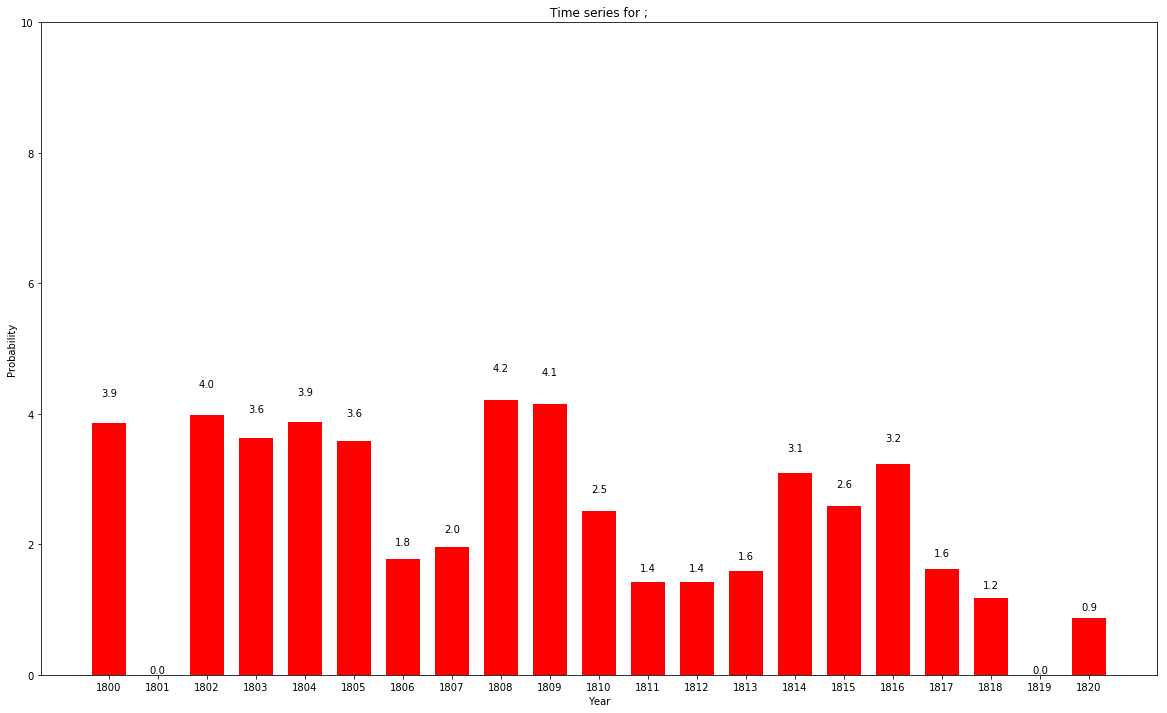

In [36]:
plotword(";")

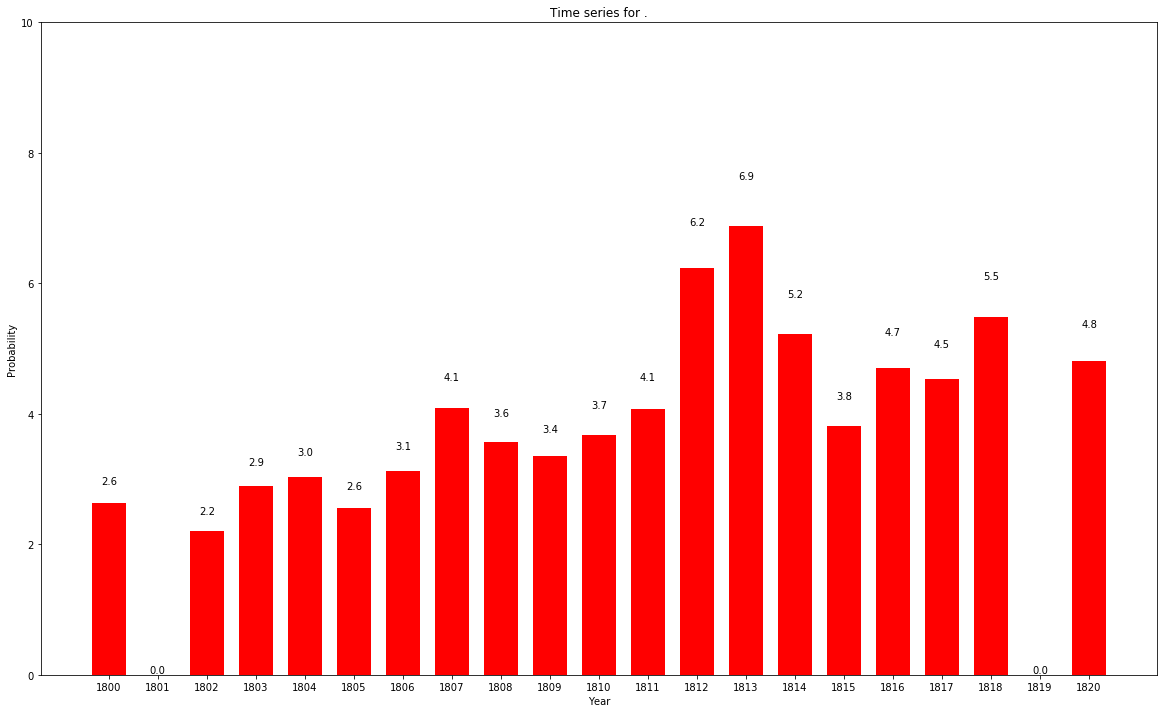

In [37]:
plotword(".")

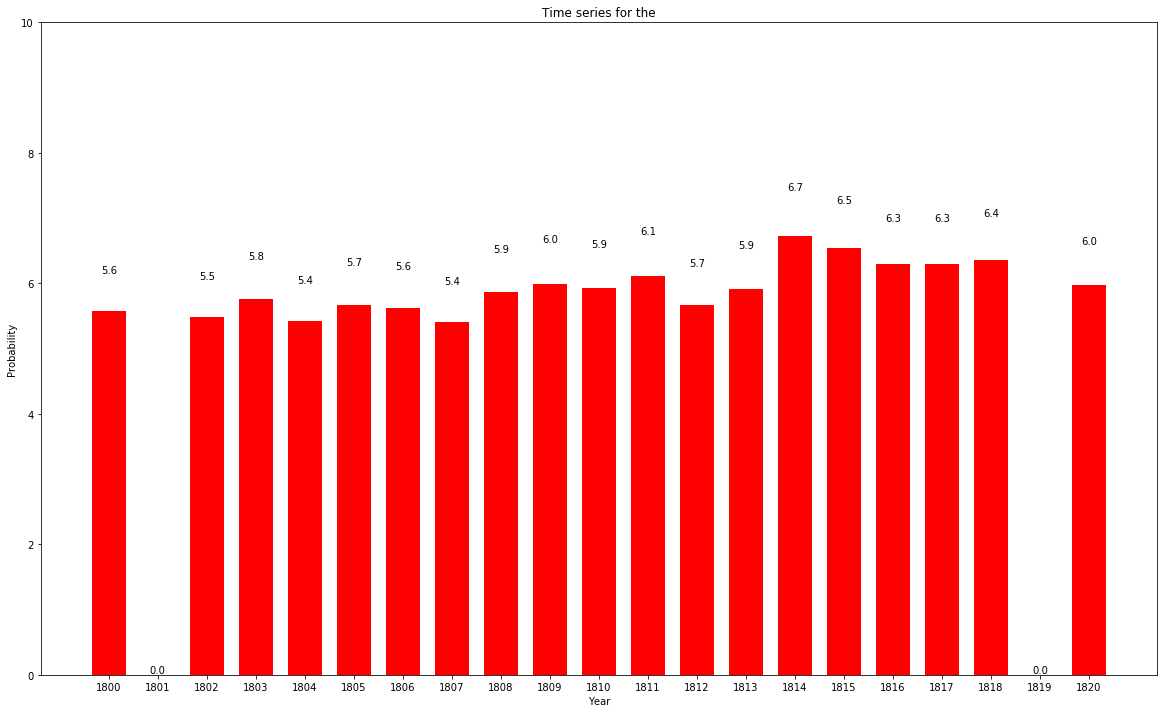

In [38]:
plotword("the")

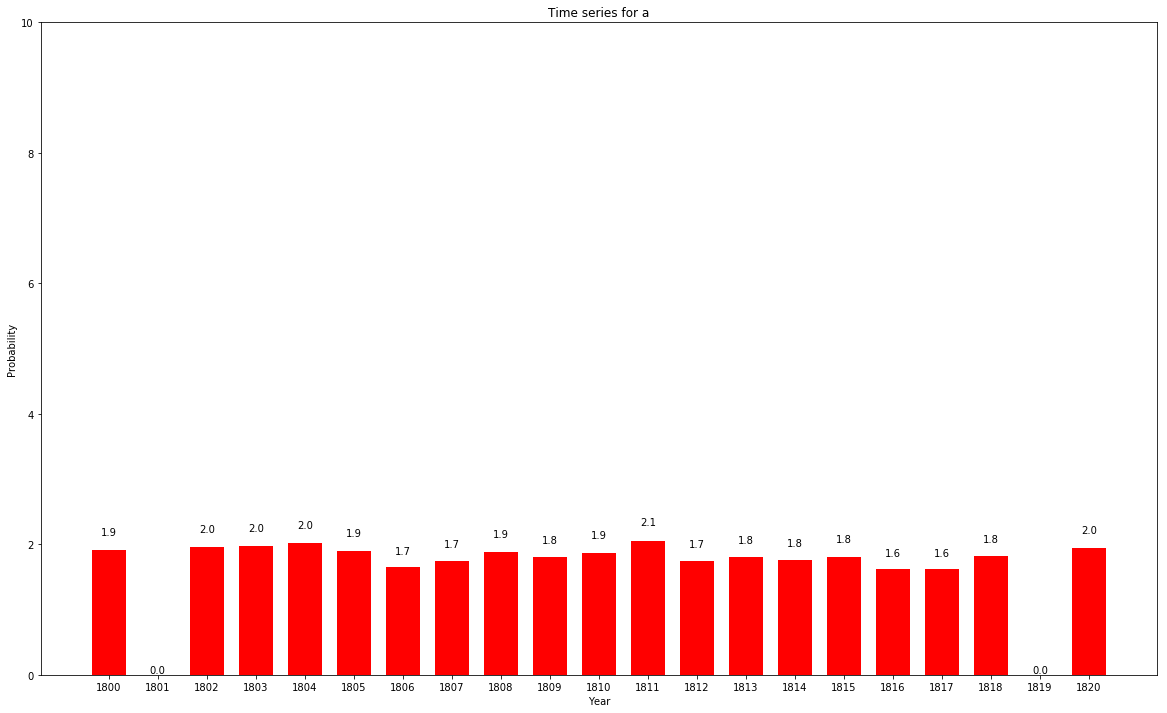

In [39]:
plotword("a")

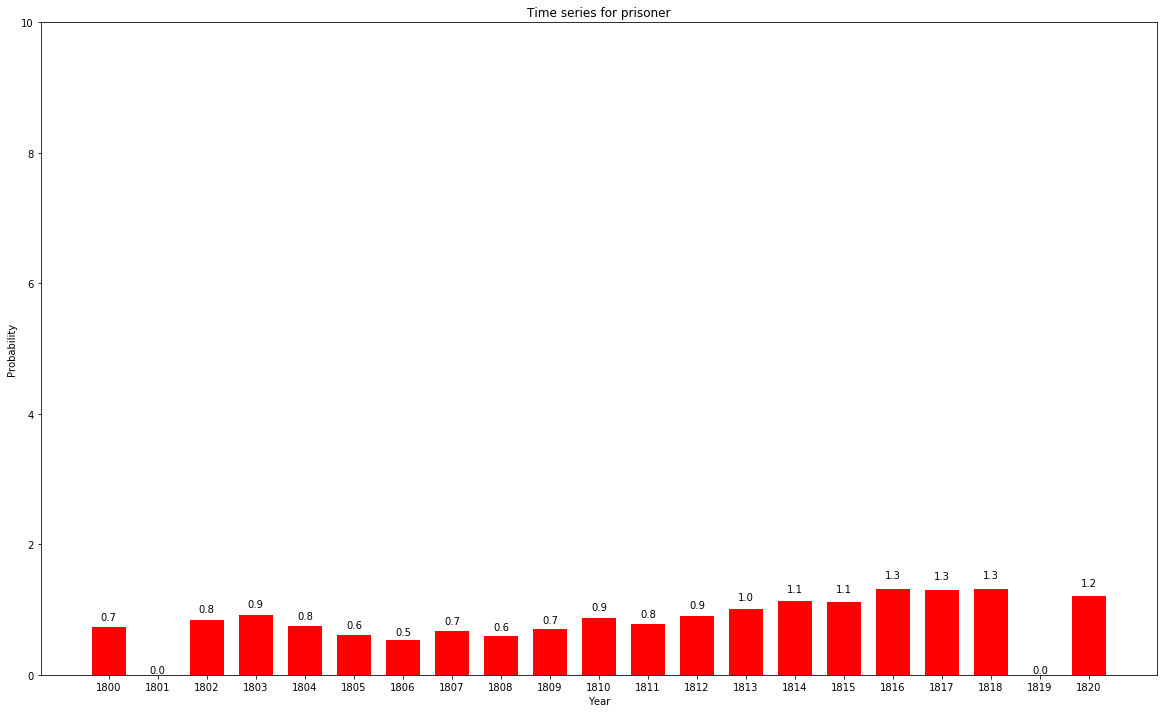

In [40]:
plotword("prisoner")